# Car Sales Dataset

## Background & Context

There is always a huge demand for used cars. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a growing tech start-up in North America that aims to find a good strategy in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

For now your objective is:

### **The objectives:**
* Explore basic stats and visualize the dataset.
* Generate a set of insights and recommendations that will help the business.

### **The key questions:**
* Which factors would affect the price of used cars?


### **Data Dictionary**

**Manufacturer** : Name of the car which includes Brand name

**Model** : Name of the car which includes Model name

**Type** : Size of the car whether 'Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'. 6 unique types.

**Year** : Manufacturing year of the car

**MPG.City** : Total miles the car runs per gallon in city.

**MPG.Highway** : Total miles the car runs per gallon on highway.

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Drive** : Type of drive (All Wheel Drive vs Front wheel drive).

**Cylinders** : Number of cylinders in the engine.

**Transmission** : Automatic or Manual.

**Passengers** : Number of seats in the car.

**Price** : The price of the used car in x 1000 USD (**Target Variable**)

In [2]:
# import necessary libraries
import pandas as pd

In [3]:
# Read the car_sales.csv data and store it as a dataframe
data = pd.read_csv('car_sales.csv')


In [4]:
# View the top 10 rows of the dataframe
data.head(10)

,Manufacturer,Model,Type,MPG_City,MPG Highway,Drive,Cylinders,Transmission,Passengers,Price
0,Acura,Integra,Small,25,31,Front,4,Manual,5,15.9
1,Acura,Legend,Midsize,18,25,Front,6,Manual,5,33.9
2,Audi,90,Compact,20,26,Front,6,Manual,5,29.1
3,Audi,100,Midsize,19,26,Front,6,Manual,6,37.7
4,BMW,535i,Midsize,22,30,AWD,4,Manual,4,30.0
5,Buick,Century,Midsize,22,31,Front,4,Automatic,6,15.7
6,Buick,LeSabre,Large,19,28,Front,6,Automatic,6,20.8
7,Buick,Roadmaster,Large,16,25,AWD,6,Automatic,6,23.7
8,Buick,Riviera,Midsize,19,27,Front,6,Automatic,5,26.3
9,Cadillac,DeVille,Large,16,25,Front,8,Automatic,6,34.7


In [5]:
# get basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  93 non-null     object 
 1   Model         93 non-null     object 
 2   Type          93 non-null     object 
 3   MPG_City      93 non-null     int64  
 4   MPG Highway   93 non-null     int64  
 5   Drive         93 non-null     object 
 6   Cylinders     93 non-null     int64  
 7   Transmission  93 non-null     object 
 8   Passengers    93 non-null     int64  
 9   Price         93 non-null     float64
dtypes: float64(1), int64(4), object(5)
memory usage: 7.4+ KB


In [16]:
# difference between df.MPG Highway and df['MPG Highway']
# when there is a space the df. wouldn't work.
data['MPG Highway']

0     31
1     25
2     26
3     26
4     30
      ..
88    21
89    30
90    25
91    28
92    28
Name: MPG Highway, Length: 93, dtype: int64

In [6]:
# get stats for both numerical and categorical (object) columns
data.describe(include='all')

,Manufacturer,Model,Type,MPG_City,MPG Highway,Drive,Cylinders,Transmission,Passengers,Price
count,93,93,93,93.000000,93.000000,93,93.000000,93,93.000000,93.000000
unique,32,93,6,NaN,NaN,2,NaN,2,NaN,NaN
top,Chevrolet,Integra,Midsize,NaN,NaN,Front,NaN,Manual,NaN,NaN
freq,8,1,22,NaN,NaN,67,NaN,61,NaN,NaN
mean,NaN,NaN,NaN,22.365591,29.086022,NaN,4.967742,NaN,5.086022,19.509677
std,NaN,NaN,NaN,5.619812,5.331726,NaN,1.297586,NaN,1.038979,9.659430
min,NaN,NaN,NaN,15.000000,20.000000,NaN,3.000000,NaN,2.000000,7.400000
25%,NaN,NaN,NaN,18.000000,26.000000,NaN,4.000000,NaN,4.000000,12.200000
50%,NaN,NaN,NaN,21.000000,28.000000,NaN,4.000000,NaN,5.000000,17.700000
75%,NaN,NaN,NaN,25.000000,31.000000,NaN,6.000000,NaN,6.000000,23.300000


In [7]:
# Find the unique classes in the Type column
data.describe(include='object')


,Manufacturer,Model,Type,Drive,Transmission
count,93,93,93,93,93
unique,32,93,6,2,2
top,Chevrolet,Integra,Midsize,Front,Manual
freq,8,1,22,67,61


In [26]:
print(data['Type'].unique())

['Small' 'Midsize' 'Compact' 'Large' 'Sporty' 'Van']


<AxesSubplot:ylabel='Frequency'>

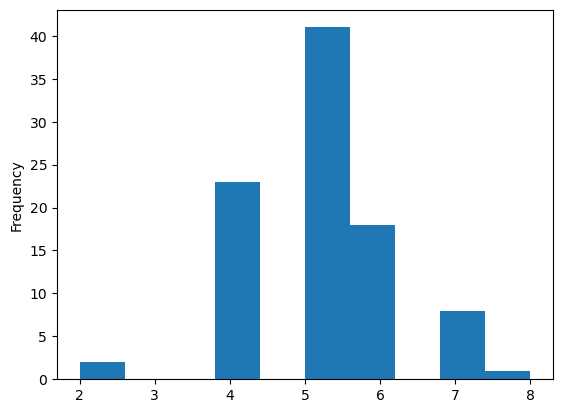

In [8]:
# Plot a histogram for Passengers features and identify the type of distribution 
data['Passengers'].plot(kind = 'hist')
# normalized distribution

In [11]:
# check the datatype of variable Cylinders
# data.dtypes
data['Cylinders'].dtypes


Manufacturer     object
Model            object
Type             object
MPG_City          int64
MPG Highway       int64
Drive            object
Cylinders         int64
Transmission     object
Passengers        int64
Price           float64
dtype: object

In [13]:
data['Cylinders'].dtypes

dtype('int64')

In [14]:
# find the average price of the cars in this dataset
data['Price'].mean()

19.509677419354837

In [15]:
# Get the five number summary of 'Passengers' variable
data['Passengers'].describe()

count    93.000000
mean      5.086022
std       1.038979
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       8.000000
Name: Passengers, dtype: float64

<AxesSubplot:>

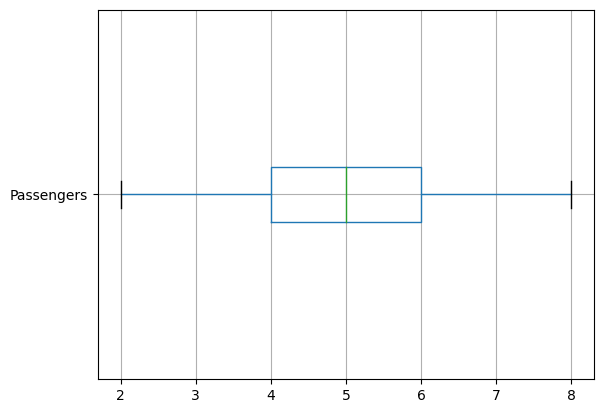

In [19]:
# Plot a box plot for Passengers variable
data.boxplot('Passengers', vert= False)

The minimum value in a box plot is the lower whisker, which is defined as the lowest value that is within 1.5 times the interquartile range (IQR) from the lower quartile (Q1). The lower whisker represents the lowest values in the dataset that are not considered outliers.

The maximum value in a box plot is the upper whisker, which is defined as the highest value that is within 1.5 times the IQR from the upper quartile (Q3). The upper whisker represents the highest values in the dataset that are not considered outliers.

The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. In a box plot, outliers are represented by individual points outside the whiskers.

In [21]:
# Plot the correlation Matrix
data.corr()

,MPG_City,MPG Highway,Cylinders,Passengers,Price
MPG_City,1.000000,0.943936,-0.684030,-0.416856,-0.594562
MPG Highway,0.943936,1.000000,-0.634325,-0.466386,-0.560680
Cylinders,-0.684030,-0.634325,1.000000,0.292330,0.654942
Passengers,-0.416856,-0.466386,0.292330,1.000000,0.057860
Price,-0.594562,-0.560680,0.654942,0.057860,1.000000


<AxesSubplot:ylabel='Density'>

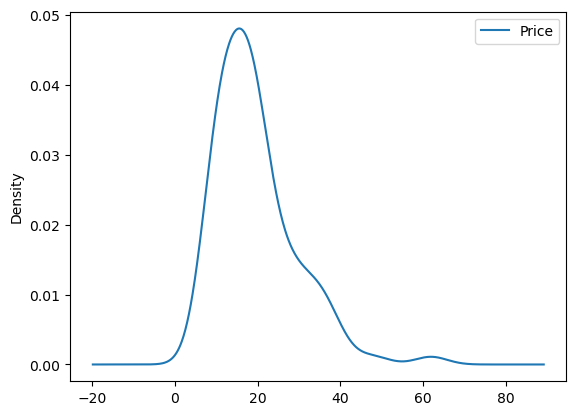

In [29]:
# Plot a chart of 'Type' vs 'Price'
# data.plot.scatter('Type', 'Price')
data.plot('Type', 'Price', kind = 'density')


<AxesSubplot:xlabel='Drive'>

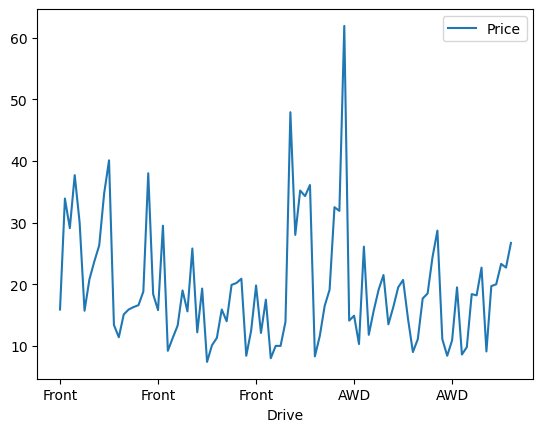

In [33]:
# Plot a chart of 'Drive' vs 'Price'
# data.plot.scatter('Drive', 'Price')
data.plot('Drive', 'Price', kind = 'line')



<AxesSubplot:title={'center':'Price'}, xlabel='Type'>

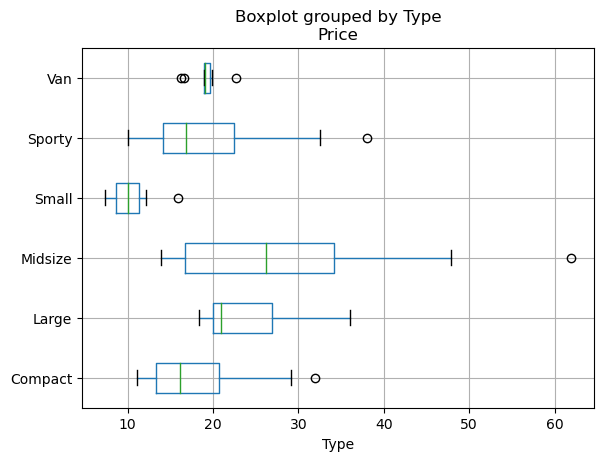

In [35]:
data.boxplot('Price', 'Type', vert= False)


<AxesSubplot:title={'center':'Price'}, xlabel='Drive'>

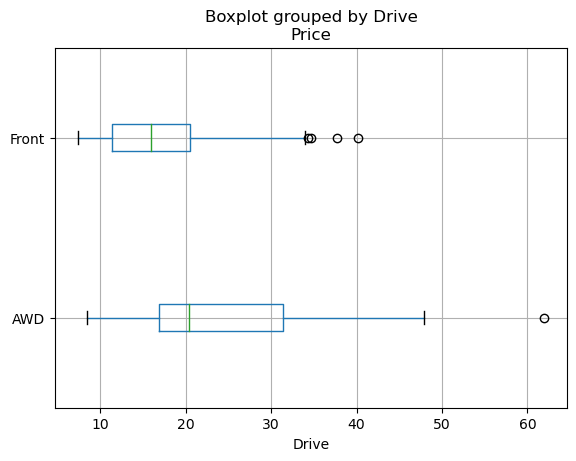

In [36]:
data.boxplot('Price', 'Drive', vert= False)
